### 마켓 데이터 크롤링
# KRX 투자자별 - 활용

<img src="http://i.imgur.com/grQHNKG.jpg">

#### 2017 FinanceData http://fb.com/financedata

# 투자주체별 매매동향 확인
1. 전체 시장에서
2. 업종별
3. 세부 종목별

### 투자자 구분코드
* 1000 금융투자
* 2000 보험
* 3000 투신
* 3100 사모
* 4000 은행
* 5000 기타금융
* 6000 연기금
* 7000 국가.지자체
* 7050 기관합계
* 7100 기타법인
* 8000 개인
* 9000 외국인
* 9001 기타외국인
* 9999 전체

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothicCoding'

In [8]:
import sqlite3
import pandas as pd
from datetime import datetime

con = sqlite3.connect('krx_investors.db')

start = datetime(2018, 1, 1)
end = datetime(2018, 12, 30)

query_tmpl = '''
    select *
    from investors 
    where `날짜` between datetime("%s") and datetime("%s")
      and (매수거래량!=0 and 매도거래량!=0 and 순매수거래량!=0 and 매수거래대금!=0 and 매도거래대금!=0 and 순매수거래대금!=0)
'''
query = query_tmpl % (start, end)
df = pd.read_sql(query, con, parse_dates=['날짜'], index_col=['날짜'])
con.close()

print('rows:', len(df))
df.head(10)

rows: 2732487


,종목코드,종목명,매수거래량,매도거래량,순매수거래량,매수거래대금,매도거래대금,순매수거래대금,업종명,투자자코드,투자자명
날짜,,,,,,,,,,,
2018-01-02,229200,KODEX 코스닥 150,5536919.0,1173966.0,4362953.0,7.994765e+10,1.694789e+10,6.299975e+10,-,1000,금융투자
2018-01-02,069500,KODEX 200,2713883.0,1546909.0,1166974.0,8.943927e+10,5.090252e+10,3.853675e+10,-,1000,금융투자
2018-01-02,233740,KODEX 코스닥150 레버리지,2243095.0,970392.0,1272703.0,4.558205e+10,1.954994e+10,2.603211e+10,-,1000,금융투자
2018-01-02,500031,신한 레버리지 천연가스 선물 ETN(H),882415.0,8457.0,873958.0,1.712355e+10,1.632881e+08,1.696026e+10,-,1000,금융투자
2018-01-02,122630,KODEX 레버리지,1830336.0,1123150.0,707186.0,3.252673e+10,1.994963e+10,1.257710e+10,-,1000,금융투자
2018-01-02,530037,삼성 레버리지 천연가스 선물 ETN,650694.0,52508.0,598186.0,1.198047e+10,9.583648e+08,1.102210e+10,-,1000,금융투자
2018-01-02,105560,KB금융,131644.0,56701.0,74943.0,8.305153e+09,3.581756e+09,4.723397e+09,기타 금융업,1000,금융투자
2018-01-02,232080,TIGER 코스닥150,430298.0,133761.0,296537.0,6.197470e+09,1.928422e+09,4.269048e+09,-,1000,금융투자
2018-01-02,207940,삼성바이오로직스,13766.0,4104.0,9662.0,5.277564e+09,1.555520e+09,3.722043e+09,기초 의약물질 및 생물학적 제제 제조업,1000,금융투자


## 전체시장 - 개인 

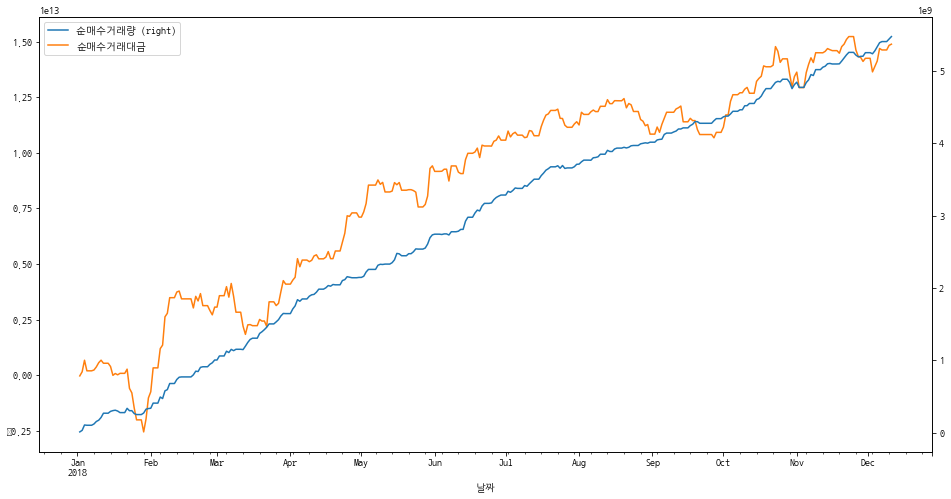

In [9]:
f = df[df['투자자코드'] == '8000'] # 개인

f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

## 전체시장 - 기관

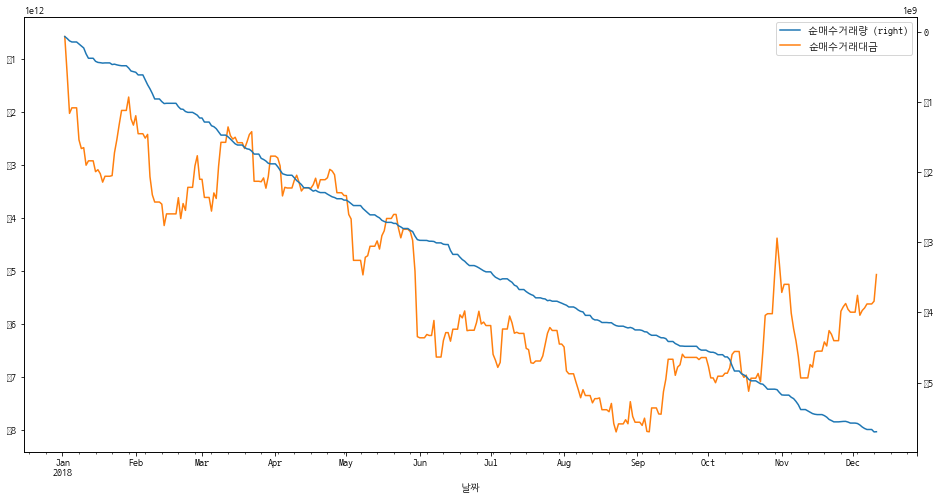

In [10]:
f = df[df['투자자코드'] == '7050'] # 기관합계

f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

## 전체시장 - 외국인

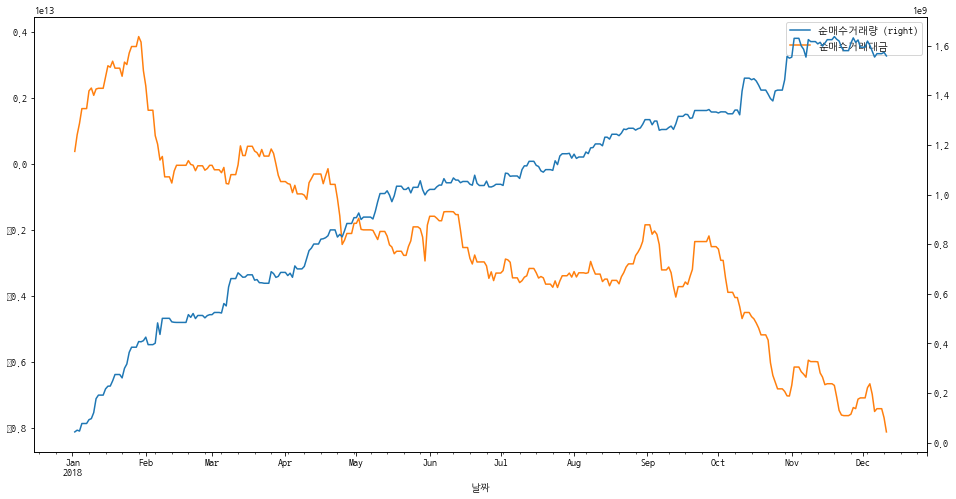

In [11]:
f = df[(df['투자자코드'] == '9000')|(df['투자자코드'] == '9001')] # 외국인 or 기타 외국인

f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

# 전체시장 - 기타법인

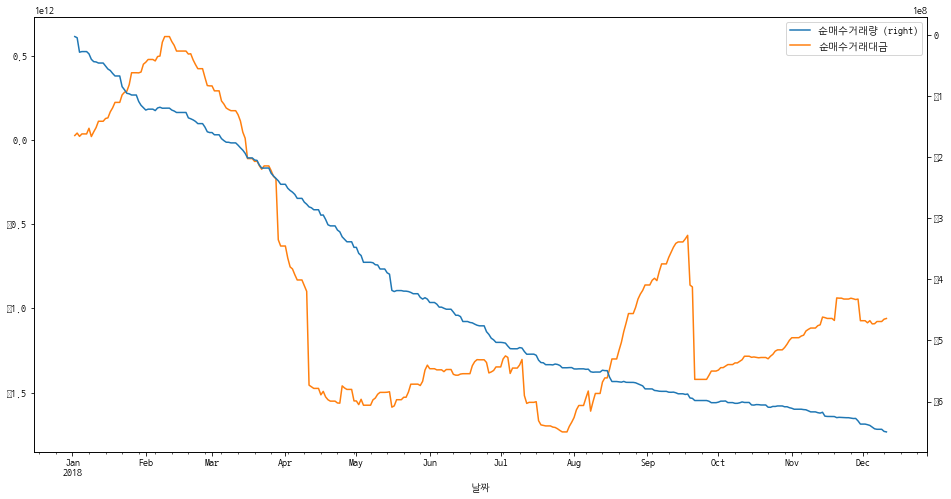

In [12]:
f = df[df['투자자코드'] == '7100'] # 기타법인

f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

# FinanceDataReader

In [13]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')
df_master.head(10)

,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입"
2,012630,HDC,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업"
3,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
4,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
5,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"
6,002360,SH에너지화학,기초 화학물질 제조업,"합성수지(PS/EPS,ABS수지) 제조"
7,001740,SK네트웍스,기타 전문 도매업,"종합무역업(전자전기제품,섬유,에너지화학제품,철강금속제품),의류,수입산합판,MDF판매..."
8,285130,SK케미칼,합성고무 및 플라스틱 물질 제조업,"PETG 수지, PET 수지, 바이오디젤, 백신"
9,011810,STX,상품 종합 도매업,"에너지 원료(석탄,석유),산업기자재(기계부품) 도매"


# 특정 섹터 지정

In [14]:
# Sector로 그룹하여, 개별 종목수 확인

grp_sector = df_master.groupby('Sector').count()
grp_sector.sort_values('Symbol', ascending=False)[:20]

,Symbol,Name,Industry
Sector,,,
특수 목적용 기계 제조업,126,126,126
소프트웨어 개발 및 공급업,121,121,120
기타 금융업,116,116,113
전자부품 제조업,112,112,111
자동차 신품 부품 제조업,93,93,93
의약품 제조업,84,84,84
기타 화학제품 제조업,77,77,77
통신 및 방송 장비 제조업,74,74,74
금융 지원 서비스업,59,59,57


# "의약품 제조업" 투자자별

In [15]:
# "의약품 제조업" 선택

df_master_medi = df_master[df_master['Sector'] == '의약품 제조업']

print('rows:', len(df_master_medi))
df_master_medi[['Symbol', 'Name']].head(10)

rows: 84


,Symbol,Name
22,003220,대원제약
43,005500,삼진제약
49,019170,신풍제약
58,033270,유나이티드
62,249420,일동제약
65,271980,제일약품
85,128940,한미약품
119,078140,대봉엘에스
121,023910,대한약품
146,009300,삼아제약


In [16]:
df_medi = df[df['종목코드'].isin(df_master_medi['Symbol'])]

print('rows:', len(df_medi))
df_medi.head(10)

rows: 93740


,종목코드,종목명,매수거래량,매도거래량,순매수거래량,매수거래대금,매도거래대금,순매수거래대금,업종명,투자자코드,투자자명
날짜,,,,,,,,,,,
2018-01-02,128940,한미약품,2805.0,1226.0,1579.0,1.646946e+09,719178000.0,927768000.0,의약품 제조업,1000,금융투자
2018-01-02,023910,대한약품,2798.0,3.0,2795.0,1.134646e+08,122100.0,113342500.0,의약품 제조업,1000,금융투자
2018-01-02,001060,JW중외제약,5768.0,4270.0,1498.0,2.617382e+08,194092100.0,67646100.0,의약품 제조업,1000,금융투자
2018-01-02,237690,에스티팜,5090.0,3783.0,1307.0,1.633934e+08,121752700.0,41640650.0,의약품 제조업,1000,금융투자
2018-01-02,002390,한독,1100.0,156.0,944.0,3.757975e+07,5329800.0,32249950.0,의약품 제조업,1000,금융투자
2018-01-02,185750,종근당,902.0,752.0,150.0,1.267765e+08,104951500.0,21825000.0,의약품 제조업,1000,금융투자
2018-01-02,000250,삼천당제약,6739.0,5969.0,770.0,1.187361e+08,104125350.0,14610750.0,의약품 제조업,1000,금융투자
2018-01-02,011040,경동제약,695.0,338.0,357.0,1.542595e+07,7436250.0,7989700.0,의약품 제조업,1000,금융투자
2018-01-02,041910,에스텍파마,310.0,70.0,240.0,3.852500e+06,868000.0,2984500.0,의약품 제조업,1000,금융투자


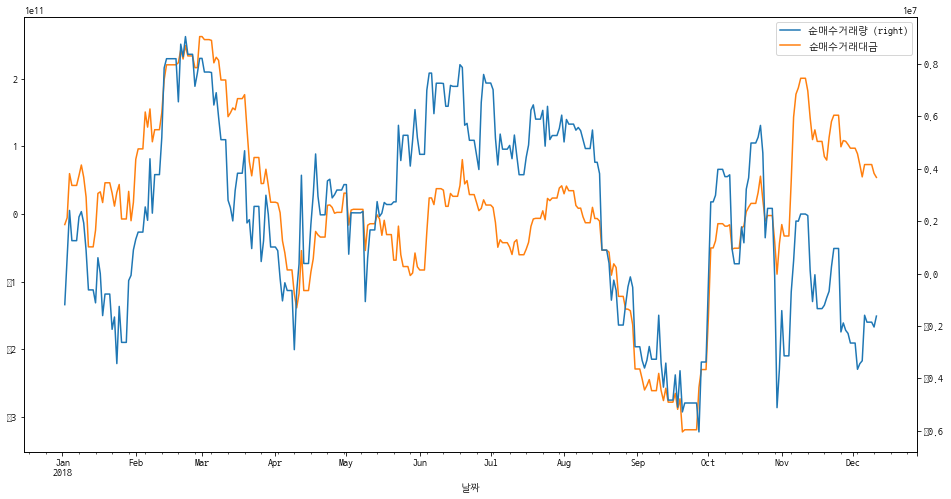

In [17]:
## "의약품 제조업" - 개인

f = df_medi[df_medi['투자자코드'] == '8000']
f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

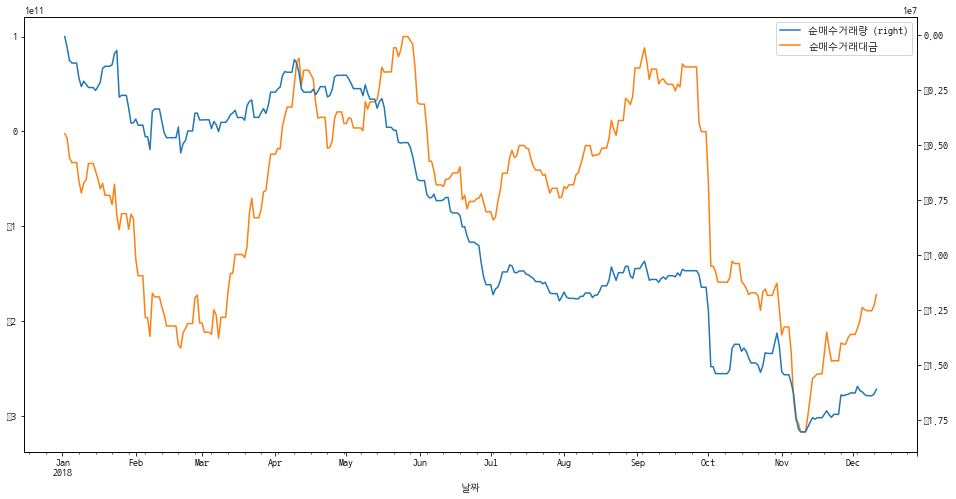

In [18]:
## "의약품 제조업" - 기관합계

f = df_medi[df_medi['투자자코드'] == '7050']
f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

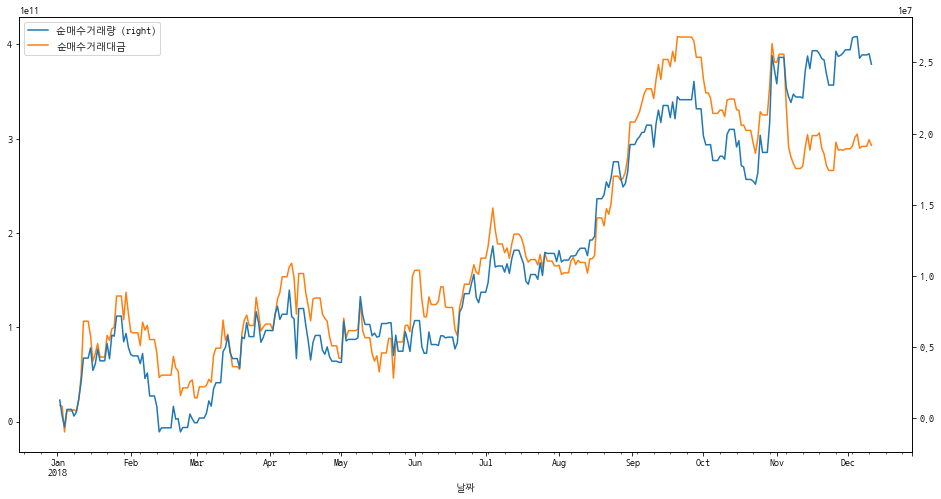

In [19]:
## "의약품 제조업" - 외국인 or 기타 외국인

f = df_medi[(df_medi['투자자코드'] == '9000')|(df_medi['투자자코드'] == '9001')] 
f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

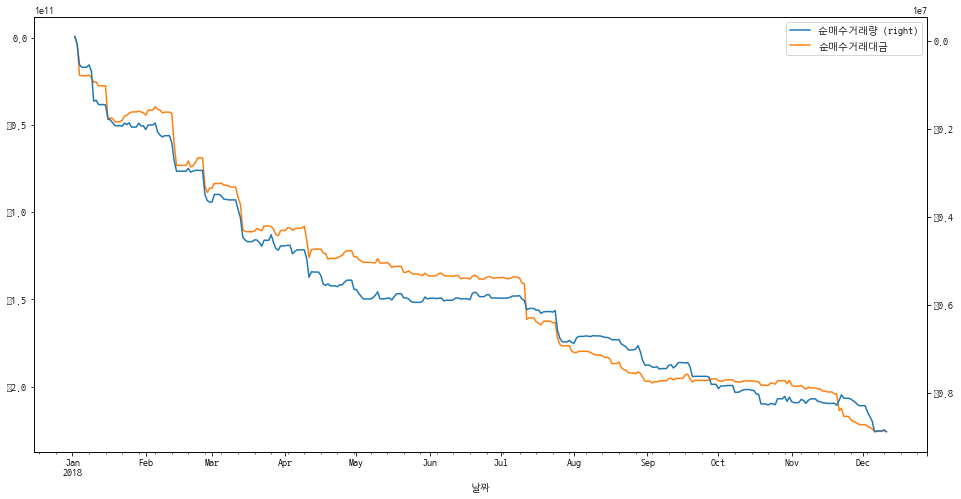

In [20]:
## "의약품 제조업" - 기타법인

f = df_medi[df_medi['투자자코드'] == '7100'] 
f[['순매수거래량', '순매수거래대금']].resample('D').sum().cumsum().plot(secondary_y='순매수거래량', figsize=(16,8))

#### 2018 [FinanceData](http://financedata.kr)